# **2장. 실습 환경 설정과 파이토치 기초**

텐서는 행렬의 다차원 표현이라고 생각하면 쉽다. 같은 크기의 행렬이 여러 개 묶여 있는 것으로 다음과 같이 표현할 수 있다.

파이토치에서 텐서를 표현하기 위해서는 다음 코드와 같이 `torch.tensor()`를 사용한다.

In [1]:
import torch
torch.tensor([[1., -1,], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

런타임 GPU로 변경

## **2.2 파이토치 기초 문법**

### **2.2.1 텐서 다루기**

**텐서 생성 및 변환**

In [2]:
import torch
print(torch.tensor([[1, 2], [3, 4]])) ## 2차원의 텐서
# print(torch.tensor([[1, 2], [3, 4]], device='cuda:0')) ## GPU에 텐서 생성
print(torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)) ## dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


텐서 `ndarray`로 변환

In [3]:
temp=torch.tensor([[1, 2], [3, 4]])
print(temp.numpy()) ## 텐서를 ndarray로 변환

# temp=torch.tensor([[1, 2], [3, 4]], device='cuda:0')
# print(temp.to('cpu').numpy()) ## GPU상의 텐서를 CPU의 텐서로 변환한 후 ndarray로 변환

[[1 2]
 [3 4]]


**텐서의 인덱스 조작**

텐서는 넘파이의 `ndarray`를 조작하는 것과 유사하게 동작하기 때문에 배열처럼 인덱스를 바로 지정하거나 슬라이스 등을 사용할 수 있다.
* 텐서의 자료형
  * `torch.FloatTensor` : 32비트의 부동 소수점
  * `torch.DoubleTensor` : 64 비트의 부동 소수점
  * `torch.LongTensor` : 64비트의 부호가 있는 정수

In [4]:
temp=torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) ## 파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1]) ## 인덱스로 접근
print('----------------------------------')
print(temp[2:5], temp[4:-1]) ## 슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
----------------------------------
tensor([3., 4., 5.]) tensor([5., 6.])


**텐서 연산 및 차원 조작**

텐서는 넘파이의 `ndarray`처럼 다양한 수학 연산이 가능하며, GPU를 사용하면 더 빠르게 연산할 수 있다. 참고로 텐서 간의 타입이 다르면 연산이 불가하다.

In [5]:
v=torch.tensor([1, 2, 3]) ## 길이가 3인 벡터 생성
w=torch.tensor([3, 4, 6])
print(w-v) ## 길이가 같은 벡터 간 뺄셈

tensor([2, 2, 3])


텐서의 차원을 변경하는 가장 대표적인 방법은 `view`를 이용하는 것이다. 이외에도 텐서를 결합하는 `stack, cat`과 차원을 교환하는 `t, transpose`도 사용된다. `view`는 넘파이의 `reshape`과 유사하며 `cat`은 다른 길이의 텐서를 하나로 병합할 때 사용한다. 또한, `tanspose`는 행렬의 전치 외에도 차원의 순서를 변경할 때도 사용된다.

In [6]:
temp=torch.tensor([
    [1, 2], [3, 4]
])

print(temp.shape)
print('-----------------')
print(temp.view(4, 1)) ## 2x2 행렬을 4x1로 변형
print('-----------------')
print(temp.view(-1)) ## 2x2 행렬을 1차원 벡터로 변형
print('-----------------')
print(temp.view(1, -1))
print('-----------------')
print(temp.view(-1, 1))

torch.Size([2, 2])
-----------------
tensor([[1],
        [2],
        [3],
        [4]])
-----------------
tensor([1, 2, 3, 4])
-----------------
tensor([[1, 2, 3, 4]])
-----------------
tensor([[1],
        [2],
        [3],
        [4]])


### **2.2.3 모델 정의**
파이토치에서 모델을 정의하기 위해서는 모듈을 상속한 클래스를 사용한다.
* 계층(layer) : 모듈 또는 모듈을 구성하는 한 개의 계층으로 합성곱층, 선형계층 등이 있다.
* 모듈 : 한 개 이상의 계층이 모여서 구성된 것으로, 모듈이 모여 새로운 모듈을 만들 수 있다.
* 모델 : 최종적으로 원하는 네트워크로, 한 개의 모듈이 모델이 될 수도 있다.

**1. 단순 신경망을 정의하는 방법**

상속받지 않는 매우 단순한 모델을 만들 때 `nn.Module`을 사용한다.

In [7]:
import torch.nn as nn

model=nn.Linear(in_features=1, out_features=1, bias=True)

**2. `nn.Module()`을 상속하여 정의하는 방법**

파이토치에서 `nn.Module`을 상속받는 모델은 기본적으로 `__init__()`과 `forward()` 함수를 포함한다. `__init__()`에서는 모델에서 사용될 모듈(`nn.Linear, nn.Conv2d`), 활성화 함수 등을 정의하고, `forward()` 함수에서는 모델에서 실행되어야 하는 연산을 정의한다.

In [8]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self, inputs):
    super(MLP, self).__init__()
    self.layer=Linear(inputs, 1)
    self.activation=Sigmoid()

  def forward(self, X):
    X=self.layer(X)
    X=self.activation(X)
    return X

**3. Sequential 신경망을 정의하는 방법**

`nn.Sequential`을 사용하면 `__init__()`에서 사용할 네트워크 모델들을 정의해 줄 뿐만 아니라 `forward()` 함수에서는 모델에서 실행되어야 할 계산을 좀 더 가독성이 뛰어나게 코드로 작성할 수 있다. 또한, `Sequential` 객체는 그 안에 포함된 각 모듈을 순차적으로 실행해 준다.

In [9]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))
    self.layer2=nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))
    self.layer3=nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True))

  def forward(self, x):
      x=self.layer1(x)
      x=self.layer2(x)
      x=x.view(x.shape[0], -1)
      x=self.layer3(x)
      return x

model=MLP()
print('Printing children\n----------------')
print(list(model.children()))
print('\n\nPrinting Modules\n----------------')
print(list(model.modules()))

Printing children
----------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
----------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_featu

`nn.Sequential`은 모델의 계층이 복잡할수록 효과가 뛰어나다.

Note) `model.modules()` & `model.children()`

`model.modules()`는 모델의 네트워크에 대한 모든 노드를 반환하며, `model.children()`은 같은 수준의 하위 노드를 반환한다.

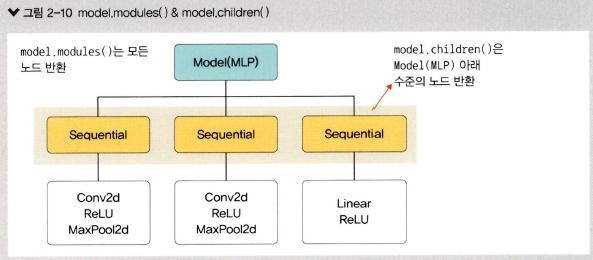

**4. 함수로 신경망을 정의하는 방법**

`Sequential`을 이용하는 것과 동일하지만, 함수로 선언할 경우 변수에 저장해 놓은 계층들을 재사용할 수 있는 장점이 있다. 하지만 모델이 복잡해지는 단점도 있다. 참고로 복잡한 모델의 경우에는 함수를 이용하는 것보다는 `nn.Module()`을 상속받아 사용하는 것이 편리하다.

In [10]:
def MLP(in_features=1, hidden_features=20, out_features=1):
  hidden=nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
  activation=nn.ReLU()
  output=nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
  net=nn.Sequential(hidden, activation, output)
  return net

`ReLU, Softmax, Sigmoid`와 같은 활성화 함수는 모델을 정의할 때 지정한다.

### **2.2.6 모델 평가**

In [11]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 12.6 MB/s eta 0:00:00


In [12]:
import torch
import torchmetrics

preds=torch.randn(10, 5).softmax(dim=-1)
target=torch.randint(5, (10, ))

acc=torchmetrics.functional.accuracy(preds, target, task='multiclass', num_classes=5)

In [13]:
import torch
import torchmetrics

metric=torchmetrics.Accuracy(task='multiclass', num_classes=5)

n_batches=10
for i in range(n_batches):
  preds=torch.randn(10, 5).softmax(dim=-1)
  target=torch.randint(5, (10, ))

  acc=metric(preds, target)
  print(f'Accuracy on batch {i} : {acc}')
acc=metric.compute()
print(f'Accuracy on all data : {acc}')

Accuracy on batch 0 : 0.10000000149011612
Accuracy on batch 1 : 0.10000000149011612
Accuracy on batch 2 : 0.10000000149011612
Accuracy on batch 3 : 0.10000000149011612
Accuracy on batch 4 : 0.5
Accuracy on batch 5 : 0.4000000059604645
Accuracy on batch 6 : 0.10000000149011612
Accuracy on batch 7 : 0.20000000298023224
Accuracy on batch 8 : 0.10000000149011612
Accuracy on batch 9 : 0.0
Accuracy on all data : 0.17000000178813934


### **2.2.7 훈련 과정 모니터링**

In [14]:
!pip install tensorboard

# **2.4 파이토치 코드 맛보기**
파이토치를 이용하여 간단한 분류 및 회귀 모델을 개발하는 방법을 살펴보자.

데이터셋 설명
1. price : 자동차 가격
2. maint : 자동차 유지 비용
3. doors : 자동차 문 개수
4. persons : 수용 인원
5. lug_capacity : 수하물 총량
6. safety : 안전성
7. output : 차 상태. unacc(허용 불가능한 수준), acc(허용 가능한 수준), good(양호), very good, vgood(매우 좋은)

1~6의 칼럼 정보를 이용하여 일곱 번째 칼럼(차 상태)을 예측하는 코드를 구핸해 보자.

먼저 필요한 라이브러리를 설치한다.

In [15]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

데이터 불러오기

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
dataset=pd.read_csv('/content/drive/MyDrive/24-1/EURON/과제/Week1/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


임베딩 처리

데이터셋을 분포 형태로 시각화

<Axes: ylabel='count'>

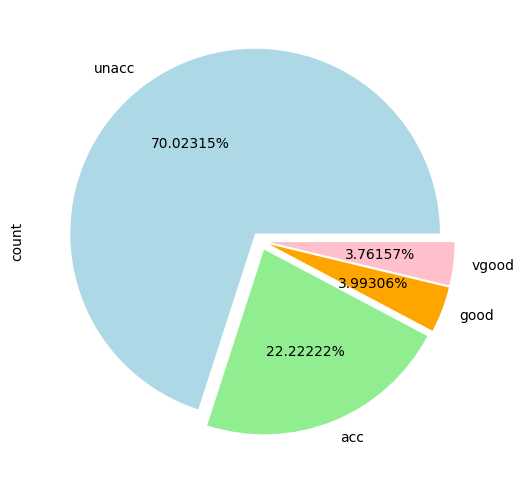

In [18]:
fig_size=plt.rcParams['figure.figsize']
fig_size[0]=8
fig_size[1]=6
plt.rcParams['figure.figsize']=fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%',
                                   colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

대부분의 자동차(70%)는 허용 불가능한 상태에 있고 20%만 허용 가능한 수준이다. 즉, 양호한 상태의 자동차 비율이 매우 낮다.

전처리 : 딥러닝은 통계 알고리즘을 기반으로 하기 때문에 단어를 숫자(텐서)로 변환해야 한다. 가장 먼저 필요한 전처리는 데이터를 파악하는 것이다. 주어진 데이터의 형태를 파악한 후 숫자로 변환해 주어야 하는데, 예제에서 다루는 데이터의 칼럼들은 모두 범주형 데이터로 구성되어 있다.

1. `astype()` 메서드를 이용하여 범주 특성을 갖는 데이터를 범주형 타입으로 변환한다.
2. 파이토치를 이용한 모델 학습을 위해 범주형 타입을 텐서로 변환한다.

In [19]:
categorical_columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

for category in categorical_columns:
  dataset[category]=dataset[category].astype('category')

## 범주형 데이터를 숫자로 변환하기 위해 cat.codes를 사용한다.
price=dataset['price'].cat.codes.values
maint=dataset['maint'].cat.codes.values
doors=dataset['doors'].cat.codes.values
persons=dataset['persons'].cat.codes.values
lug_capacity=dataset['lug_capacity'].cat.codes.values
safety=dataset['safety'].cat.codes.values

# np.stack은 두 개 이상의 넘파이 객체를 합칠 때 사용한다.
categorical_data=np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

범주형 데이터 -> dataset[category] -> 넘파이 배열 -> 텐서
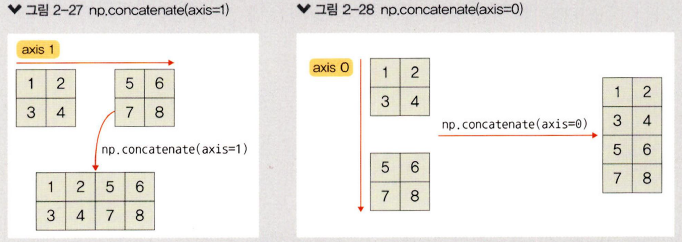

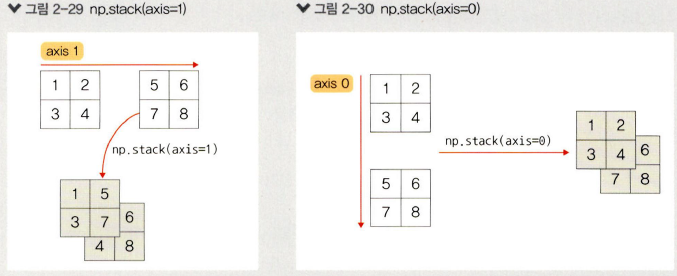

In [20]:
a=np.array([[1, 2], [3, 4]])
b=np.array([[5, 6], [7, 8]])
c=np.array([[5, 6], [7, 8], [9, 10]])

print(np.concatenate((a, b), axis=0))
print('------------------------------')
print(np.stack((a, b), axis=0))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
------------------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [21]:
print(np.concatenate((a, c), axis=0))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [22]:
# print(np.stack((a, c), axis=0))
## np.stack은 합치려는 두 넘파이 배열의 차원이 다르기 때문에 오류 발생

배열을 텐서로 변환

In [23]:
categorical_data=torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

마지막으로 레이블로 사용할 칼럼에 대해서도 텐서로 변환해 준다. 이번에는 `get_dummies`를 이용하여 넘파이 배열로 변환한다.

In [24]:
outputs=pd.get_dummies(dataset.output)
outputs=outputs.values
outputs=torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


가변수로 만들어 준다는 의미는 문자를 숫자 (0, 1)로 바꾸어 준다는 의미이다.

In [25]:
import pandas as pd
import numpy as np

data={
    'gender' : ['male', 'female', 'male'],
    'weight' : [72, 55, 68],
    'nation' : ['Japan', 'Korea', 'Australia']
}

df=pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


성별과 국적을 숫자로 변환하기 위해 `get_dummies()`를 적용한다.

In [26]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False


원래 숫자의 값을 가졌던 몸무게는 변화가 없고 성별과 국적만 0과 1로 변경되었다.

Note) `ravel(), reshape(), flatten()`은 텐서의 차원을 바꿀 때 사용된다.

In [27]:
a=np.array([[1, 2],
            [3, 4]])
print(a.ravel())
print(a.reshape(-1))
print(a.flatten())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


In [28]:
torch.Size([1728, 6])
torch.Size([6912])

torch.Size([6912])

워드 임베딩은 유사한 단어 끼리 유사하게 인코딩되도록 표현하는 방법이다. 또한, 높은 차원의 임베딩일수록 단어 간의 세부적인 관계를 잘 파악할 수 있다. 따라서 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용한다.

배열을 N차원으로 변환하기 위해 먼저 모든 범주형 칼럼에 대한 임베딩 크기(벡터 차원)를 정의한다. 임베딩 크기에 대한 정확한 규칙은 없지만, 칼럼의 고유 값 수를 2로 나누는 것을 많이 사용한다. 예를 들어 price 칼럼은 네 개의 고유 값을 갖기 때문에 임베딩 크기는 4/2=2이다.

(모든 범주형 칼럼의 고유 값 수, 차원의 크기) 형태로 배열을 만든다.

In [29]:
categorical_column_sizes=[len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes=[(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


데이터셋을 훈련과 테스트 용도로 분리한다.

In [30]:
total_records=1728
test_records=int(total_records*.2)

categorical_train_data=categorical_data[:total_records-test_records]
categorical_test_data=categorical_data[total_records-test_records:total_records]
train_outputs=outputs[:total_records-test_records]
test_outputs=outputs[total_records-test_records:total_records]

데이터를 훈련과 테스트 용도로 올바르게 분할했는지 확인하기 위해 레코드 개수를 출력해 본다.

In [31]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


모델 네트워크 생성

In [32]:
class Model(nn.Module):
  def __init__(self, embedding_size, output_size, layers, p=0.4):
    super().__init__()
    self.all_embeddings=nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
    self.embedding_dropout=nn.Dropout(p)
    all_layers=[]
    num_categorical_cols=sum((nf for ni, nf in embedding_size))
    input_size=num_categorical_cols ## 입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size 변수에 저장
    for i in layers:
      all_layers.append(nn.Linear(input_size, i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))
      input_size=i

    all_layers.append(nn.Linear(layers[-1], output_size))
    self.layers=nn.Sequential(*all_layers)

  def forward(self, x_categorical):
    embeddings=[]
    for i, e in enumerate(self.all_embeddings):
      embeddings.append(e(x_categorical[:, i]))
    x=torch.cat(embeddings, 1)
    x=self.embedding_dropout(x)
    x=self.layers(x)
    return x

1. 클래스 형태로 구현되는 모델은 `nn.Module`을 상속받는다.
2. `__init__()`은 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용하며, 객체가 생성될 때 자동으로 호출된다.
* `self` : 첫 번째 파라미터는 `self`를 지정해야 하며 자기 자신을 의미한다. 예를 들어 `ex`라는 함수가 있을 때 `self`의 의미는 다음 그림과 같다.

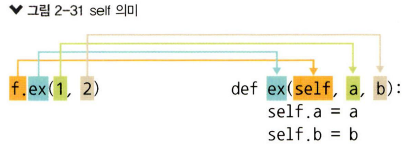

* `embedding_size` : 범주형 칼럼의 임베딩 크기
* `output_size` : 출력층의 크기
* `layers` : 모든 계층에 대한 목록
* `p` : 드롭아웃(기본값은 0.5)
3. `super().__init__()`은 부모 클래스에 접근할 때 사용하며 `super`는 `self`를 사용하지 않는 것에 주의해야 한다.
4. 모델의 네트워크 계층을 구축하기 위해 `for` 문을 이용하여 각 계층을 `all_layers` 목록에 추가한다. 추가한 계층은 다음과 같다.
* `Linear` : 선형 계층은 입력 데이터에 선형 변환을 진행한 결과이다. 선형 변환을 위해서는 다음 수식을 사용한다.
$$y=Wx+b$$ (y : 선형 계층의 출력 값, W : 가중치, x : 입력 값, b : 바이어스)

따라서 선형 계층은 입력과 가중치를 곱한 후 바이어스를 더한 결과이다.
* `ReLU` : 활성화 함수로 사용
* `BatchNorm1d` : 배치 정규화 용도로 사용
* `Dropout` : 과적합 방지에 사용
5. `forward()` 함수는 학습 데이터를 입력받아서 연산을 진행한다. `forward()` 함수는 모델 객체를 데이터와 함께 호출하면 자동으로 실행된다.

모델 훈련을 위해 앞에서 정의했던 `Model` 클래스의 객체를 생성한다. 객체를 생성하면서 (범주형 칼럼의 임베딩 크기, 출력 크기, 은닉층의 뉴런, 드롭아웃)을 전달한다. 여기에서 은닉층을 [200, 100, 50]으로 정의했지만 다른 크기로 지정하여 테스트해 보는 것도 학습하는 데 도움이 될 것이다.



In [33]:
model=Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


모델을 훈련시키기 전에 손실 함수와 옵티마이저에 대해 정의해야 한다. 이번 예제는 데이터를 분류해야 하는 것으로 크로스 엔트로피 손실 함수를 사용한다. 또한, 옵티마이저로는 아담을 사용한다.

In [34]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

파이토치는 GPU에 최적화된 딥러닝 프레임워크이다. 하지만 GPU가 없다면 CPU를 사용할 수 있도록 지정해 주어야 한다. 다음은 GPU가 있다면 GPU를 사용하고, 없다면 CPU를 사용하도록 하는 코드이다.

In [35]:
if torch.cuda.is_available():
  device=torch.device('cuda')
else:
  device=torch.device('cpu')

준비된 데이터를 이용하여 모델 학습

In [36]:
epochs=500
aggregated_losses=[]
train_outputs=train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs): ## for 문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
  i += 1
  y_pred=model(categorical_train_data).to(device)
  single_loss=loss_function(y_pred, train_outputs)
  aggregated_losses.append(single_loss) ## 반복할 때마다 오차를 aggregated_losses에 추가

  if i%25==1:
    print(f'epoch : {i:3} loss : {single_loss.item():10.8f}')

  optimizer.zero_grad()
  single_loss.backward() ## 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
  optimizer.step() ## 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트

print(f'epoch : {i:3} loss : {single_loss.item():10.10f}') ## 오차가 25 에포크마다 출력

epoch :   1 loss : 1.57046223
epoch :  26 loss : 1.38052452
epoch :  51 loss : 1.27788305
epoch :  76 loss : 1.17987132
epoch : 101 loss : 1.06342506
epoch : 126 loss : 0.91734517
epoch : 151 loss : 0.82454330
epoch : 176 loss : 0.75003690
epoch : 201 loss : 0.68644261
epoch : 226 loss : 0.64788097
epoch : 251 loss : 0.63875520
epoch : 276 loss : 0.62777817
epoch : 301 loss : 0.60970712
epoch : 326 loss : 0.59817249
epoch : 351 loss : 0.58167261
epoch : 376 loss : 0.58620673
epoch : 401 loss : 0.58199555
epoch : 426 loss : 0.57889438
epoch : 451 loss : 0.57311308
epoch : 476 loss : 0.57691169
epoch : 500 loss : 0.5794695020


학습이 끝났으므로 테스트 데이터셋으로 예측을 진행해 보자. 앞에서 준비했던 `categorical_test_data` 데이터셋을 모델에 적용한다.

In [38]:
test_outputs=test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
  y_val=model(categorical_test_data)
  loss=loss_function(y_val, test_outputs)
print(f'Loss : {loss:.8f}')

Loss : 0.57998532


훈련 데이터셋에서 도출된 손실 값과 비슷하므로 과적합은 발생하지 않았다.

이제 테스트 데이터셋을 이용했을 때 모델이 얼마나 잘 예측하는지 살펴보자. 앞에서 모델 네트워크의 `output_size`에 4를 지정했다. 즉, 출력층에 네 개의 뉴런이 포함되도록 지정했으므로 각 예측에는 네 개의 값이 포함될 것이다.

In [39]:
print(y_val[:5])

tensor([[  1.8011,   1.2431,  -1.8289,  -1.6692],
        [  9.1380,   7.2923, -10.8392, -10.1860],
        [  2.9859,   1.8759,  -3.3441,  -3.1503],
        [  3.1124,   1.8747,  -4.0411,  -3.8973],
        [  3.1520,   1.8246,  -4.3380,  -4.0774]])


실제 출력이 0이면 인덱스 0(2.7215)의 값이 인덱스 1(1.6601)의 값보다 높아야 한다.

따라서 다음과 같은 코드를 이용하여 목록에서 가장 큰 값을 갖는 인덱스를 알아본다. 다시 말하지만 실제 값이 아닌 인덱스를 찾는 것이다.

In [40]:
y_val=np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


그러면 `y_val`에서 처음 다섯 개의 값이 출력된다.

출력 결과 모두 인덱스 0이 출력되었다. 즉, 인덱스가 0인 값이 인덱스가 1인 값보다 크므로 처리된 출력이 0임을 확인할 수 있다.

마지막으로 `sklearn.metrics` 모듈의 `classification_report, confusion_matrix, accuracy_score` 클래스를 사용하여 정확도, 정밀도와 재현율을 알아보자.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[258   1]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.50      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.63      0.50      0.44       345
weighted avg       0.69      0.75      0.65       345

0.7507246376811594


신경망에서 필요한 모든 파라미터를 무작위로 선택했다는 것을 감안할 때 75%의 정확도는 나쁘지 않다. 파라미터를 변경하면서 더 나은 성능을 찾아보는 것도 학습에 도움이 될 것이다.

마지막으로 딥러닝 분류 모델의 성능 평가 지표를 알아보겠다. 성능 평가 지표로 정확도, 재현율, 정밀도, F1-스코어가 있다.
* True Positive : 모델(분류기)이'1'이라고 예측했는데 실제 값도 '1'인 경우
* True Negative : 모델(분류기)이 '0'이라고 예측했는데 실제 값도 '0'인 경우
* False Positive : 모델이 '1'이라고 예측했는데 실제 값은 '0'인 경우로, Type 1 오류라고도 한다.
* False Negative : 모델이 '0'이라고 예측했는데 실제 값은 '1'인 경우로, Type 2 오류라고도 한다.

**정확도** : 전체 예측 건수에서 정답을 맞힌 건수의 비율.

**재현율** : 실제로 정답이 1이라고 할 때 모델도 1로 예측한 비율. 처음부터 데이터가 1일 확률이 적을 때 사용하면 좋다.

**정밀도** : 모델이 1이라고 예측한 것 중에서 실제로 정답이 1인 비율.

**F1-스코어** : 일반적으로 정밀도와 재현율은 트레이드오프 관계이다. 정밀도가 높으면 재현율이 낮고, 재현율이 높으면 정밀도가 낮다. 이러한 트레이드오프 문제를 해결하려고 정밀도와 재현율의 조화 평균을 이용한 것이 F1-스코어 평가이다.